# Projet 4 Réalisez une étude de santé publique avec  Python

In [144]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Partie 1 - Importation et nettoyage des données

### 1.  Fichier d’aide alimentaire qui contient :
-	Le pays bénéficiaire.
-	L’année.
-	Le produit.
-	La quantité qui a été donnée comme aide alimentaire, en tonnes.

### A. Lecture du fichier

In [145]:
aide_alimentaire = pd.read_csv("D:/Open_work/P4/doc_origine/DAN-P4-FAO/aide_alimentaire.csv")

In [146]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [147]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [148]:
aide_alimentaire.describe(include="all")

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


In [149]:
aide_alimentaire.shape

(1475, 4)

### B. Nettoyage du fichier

In [150]:
# Changer les noms des colonnes en minuscules
aide_alimentaire.columns = aide_alimentaire.columns.str.lower()

In [151]:
# Changer le nom de colonne de 'pays bénéficiaire' 
aide_alimentaire = aide_alimentaire.rename(columns={'pays bénéficiaire':'zone'})

In [152]:
# Trouver le nombre des doublons
aide_alimentaire.duplicated(['zone','année','produit']).sum()

0

In [153]:
# Nombre de valeurs manquantes
aide_alimentaire.isnull().sum()

zone       0
année      0
produit    0
valeur     0
dtype: int64

In [154]:
aide_alimentaire.head()

,zone,année,produit,valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


### 2.	Fichier de disponibilité alimentaire pour l’année 2017 qui contient 17 variables :
-	Le pays.
-	Le produit.
-	4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
-	10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
-	Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.


### A. Lecture du fichier

In [155]:
dispo_alimentaire = pd.read_csv("D:/Open_work/P4/doc_origine/DAN-P4-FAO/dispo_alimentaire.csv")

In [156]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [157]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [158]:
dispo_alimentaire.describe(include="all")

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Japon,Pommes de Terre,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,NaN,NaN,NaN,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [159]:
dispo_alimentaire.shape

(15605, 18)

### B. Nettoyage du fichier

In [160]:
# Changer les noms des colonnes en minuscules
dispo_alimentaire.columns = dispo_alimentaire.columns.str.lower()

In [161]:
# Changer les noms de colonnes
dispo_alimentaire = dispo_alimentaire.rename(columns = {"disponibilité alimentaire (kcal/personne/jour)":"dispo_ali_kcal_pers_j"})

In [162]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"disponibilité alimentaire en quantité (kg/personne/an)":"dispo_ali_kg_pers_an"})

In [163]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"disponibilité de matière grasse en quantité (g/personne/jour)":"dispo_mg_g_pers_j"})

In [164]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"disponibilité de protéines en quantité (g/personne/jour)":"dispo_pt_g_pers_j"})

In [165]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"aliments pour animaux":"aliments_animaux"})

In [166]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"disponibilité intérieure":"dispo_inter"})

In [167]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"exportations - quantité":"expor_qte"})

In [168]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"importations - quantité":"impor_qte"})

In [169]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"autres utilisations":"autre"})

In [170]:
dispo_alimentaire = dispo_alimentaire.rename(columns = {"variation de stock":"variation_stock"})

In [171]:
# Trouver le nombre des doublons
dispo_alimentaire.duplicated(['zone','produit']).sum()

0

In [172]:
# Porcentage de valeurs manquantes
dispo_alimentaire.isnull().mean()

zone                     0.000000
produit                  0.000000
origine                  0.000000
aliments_animaux         0.825697
autre                    0.647805
dispo_ali_kcal_pers_j    0.087408
dispo_ali_kg_pers_an     0.101890
dispo_mg_g_pers_j        0.244217
dispo_pt_g_pers_j        0.259148
dispo_inter              0.014290
expor_qte                0.216533
impor_qte                0.048254
nourriture               0.101890
pertes                   0.725857
production               0.411727
semences                 0.866004
traitement               0.853124
variation_stock          0.565780
dtype: float64

In [173]:
dispo_alimentaire.head()

,zone,produit,origine,aliments_animaux,autre,dispo_ali_kcal_pers_j,dispo_ali_kg_pers_an,dispo_mg_g_pers_j,dispo_pt_g_pers_j,dispo_inter,expor_qte,impor_qte,nourriture,pertes,production,semences,traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


### 3. fichier de population qui inclut :
-	Le pays.
-	L’année.
-	La population du pays, exprimée en milliers d’habitants.


### A. Lecture du fichier

In [174]:
population = pd.read_csv("D:/Open_work/P4/doc_origine/DAN-P4-FAO/population.csv")

In [175]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [176]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [177]:
population.describe(include="all")

,Zone,Année,Valeur
count,1416,1416.000000,1.416000e+03
unique,236,NaN,NaN
top,Fédération de Russie,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.500000,3.144793e+04
std,NaN,1.708428,1.300812e+05
min,NaN,2013.000000,7.930000e-01
25%,NaN,2014.000000,3.783410e+02
50%,NaN,2015.500000,5.126480e+03
75%,NaN,2017.000000,1.930666e+04


In [178]:
population.shape

(1416, 3)

### B. Nettoyage du fichier

In [179]:
# Changer les noms des colonnes en minuscules
population.columns = population.columns.str.lower()

In [180]:
# Changer le nom de colonne de 'valeur' 
population = population.rename(columns={"valeur":"populations"})

In [181]:
# Trouver le nombre des doublons
population.duplicated(['zone','année']).sum()

0

In [182]:
# Porcentage de valeurs manquantes
population.isnull().mean()

zone           0.0
année          0.0
populations    0.0
dtype: float64

In [183]:
population.head()

,zone,année,populations
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


### 4. Fichier d’insécurité alimentaire, qui inclut :
-	Le pays.
-	Intervalle d’années.
-	Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2016-2018, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2017).

### A. Lecture du fichier

In [184]:
sous_nutrition = pd.read_csv("D:/Open_work/P4/doc_origine/DAN-P4-FAO/sous_nutrition.csv")

In [185]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [186]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [187]:
sous_nutrition.describe(include="all")

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Fédération de Russie,2013-2015,<0.1
freq,6,203,120


In [188]:
sous_nutrition.shape

(1218, 3)

### B. Nettoyage du fichier

In [189]:
# Changer les noms des colonnes en minuscules
sous_nutrition.columns = sous_nutrition.columns.str.lower()

In [190]:
# Changer le nom de colonne de 'valeur' 
sous_nutrition = sous_nutrition.rename(columns={"valeur":"nbr_pers"})

In [191]:
sous_nutrition.isnull().mean()

zone        0.000000
année       0.000000
nbr_pers    0.487685
dtype: float64

#### Modifier les donées de le colonne 'année'

In [192]:
sous_nutrition['année']= sous_nutrition['année'].apply(lambda x: x.split('-')[0])

In [193]:
sous_nutrition['année'] = sous_nutrition['année'].astype(int)

In [194]:
sous_nutrition['année'] = sous_nutrition['année'].apply(lambda x: x+1)

In [195]:
sous_nutrition.head()

,zone,année,nbr_pers
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [196]:
# Trouver le donnée qualitatif
sous_nutrition['nbr_pers'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [197]:
# Ramplacer le donnée '<0.1'  par '0'
sous_nutrition['nbr_pers'].replace(['<0.1'], 0, inplace=True)

In [198]:
sous_nutrition['nbr_pers'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', 0, '21.7', '22.4',
       '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8', '0.4',
       '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1', '2.3',
       '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8', '4.6',
       '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3', '21.3',
       '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3', '193.1',
       '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7', '7.3',
       '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5', '11.9',
       '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9', '5.9', '7',
       '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7', '17.4', '20.2',
       '22.2', '22.8', '24.6', '31.1', '28.5', '25.4', '24.8', '26.1',
       '14.5', '15.4', '16.5', '15.8', '15.7', '10.8', '11.2', '11.6

In [199]:
#Vérifier  "Nan" sont pour les quelles pays 
pays_nan=sous_nutrition[sous_nutrition.isnull().T.any()]

In [200]:
pays_nan.head(20)

,zone,année,nbr_pers
24,Allemagne,2013,NaN
25,Allemagne,2014,NaN
26,Allemagne,2015,NaN
27,Allemagne,2016,NaN
28,Allemagne,2017,NaN
29,Allemagne,2018,NaN
30,Andorre,2013,NaN
31,Andorre,2014,NaN
32,Andorre,2015,NaN
33,Andorre,2016,NaN


In [201]:
pays_nan['zone'].unique()

array(['Allemagne', 'Andorre', 'Antigua-et-Barbuda', 'Argentine',
       'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn',
       'Bélarus', 'Belgique', 'Bermudes', 'Bhoutan', 'Bosnie-Herzégovine',
       'Brésil', 'Brunéi Darussalam', 'Burundi', 'Canada',
       'Chine - RAS de Hong-Kong', 'Chine, continentale', 'Comores',
       'Croatie', 'Cuba', 'Danemark', 'Djibouti', 'Érythrée', 'Espagne',
       'Estonie', "États-Unis d'Amérique", 'Fédération de Russie',
       'Finlande', 'France', 'Grèce', 'Grenade', 'Groenland', 'Guinée',
       'Guinée équatoriale', 'Guinée-Bissau', 'Hongrie', 'Îles Cook',
       'Îles Marshall', 'Irlande', 'Islande', 'Israël', 'Italie', 'Japon',
       'Kazakhstan', 'Koweït', 'Lettonie', 'Libye', 'Lituanie',
       'Luxembourg', 'Maldives', 'Malte', 'Micronésie (États fédérés de)',
       'Monténégro', 'Nauru', 'Niger', 'Nioué', 'Norvège',
       'Nouvelle-Zélande', 'Ouganda', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Pays-Bas'

In [202]:
sous_nutrition['nbr_pers']=pd.to_numeric(sous_nutrition['nbr_pers'], errors = 'coerce')

In [203]:
# Trouver le nombre des doublons
sous_nutrition.duplicated(['zone','année']).sum()

0

In [204]:
sous_nutrition.isnull().mean()

zone        0.000000
année       0.000000
nbr_pers    0.487685
dtype: float64

In [205]:
sous_nutrition.head()

,zone,année,nbr_pers
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


## Partie 2 - MISSION (Marc)

### 1. La proportion de personnes en état de sous-nutrition pour l’année 2017

**A. Population en 2017 par pays (exprimée en milliers d’habitants)**

In [206]:
popu_17 = population.loc[population['année'] == 2017, :]
popu_17.head()

,zone,année,populations
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


**B. Nombre de personnes en sous-nutrition 2017 (exprimée en millions d’habitants)**

In [207]:
sous_nutrition_17 = sous_nutrition.loc[sous_nutrition['année'] == 2017, :].copy()

In [208]:
sous_nutrition_17.head()

,zone,année,nbr_pers
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,NaN


**C. Calcul de la proportion de personnes en sous-nutrition**

In [209]:
#Jointure
popu_sous = pd.merge(popu_17,sous_nutrition_17, how='inner', on = ['zone','année'])
popu_sous.head()

,zone,année,populations,nbr_pers
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,NaN


In [210]:
# calcul de la proportion de personnes en sous-nutrition
proportion = 100*(popu_sous['nbr_pers'].sum()*1000)/(popu_sous['populations'].sum())

**D. Résultat :**

In [211]:
print("La proportion de personnes en état de sous-nutrition pour l’année 2017: ", proportion.round(2),"%")

La proportion de personnes en état de sous-nutrition pour l’année 2017:  7.1 %


### 2. Le nombre théorique de personnes qui pourraient être nourries en 2017
Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale 

**A. Calculer le nombre total de kcal en 2017** 

In [212]:
# Jointure entre la table 'dispo_alimenataire' et 'popu_17'
df1 = pd.merge(dispo_alimentaire, popu_17, how = 'inner', on = 'zone')
df1.head()

,zone,produit,origine,aliments_animaux,autre,dispo_ali_kcal_pers_j,dispo_ali_kg_pers_an,dispo_mg_g_pers_j,dispo_pt_g_pers_j,dispo_inter,expor_qte,impor_qte,nourriture,pertes,production,semences,traitement,variation_stock,année,populations
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113


In [213]:
# Calculer le nombre total de kcal (population exprimée en milliers d’habitants)
kcal_an = df1['dispo_ali_kcal_pers_j'] * (df1['populations']*1000) * 365
kcal_total = kcal_an.sum()

In [214]:
print("Le nombre total de kcalkcal_total:", "%.2e" %kcal_total)

Le nombre total de kcalkcal_total: 7.64e+15


**B. Calculer le nombre théorique de personnes qui pourraient être nourries**

In [215]:
# Kcal nécessaures pour une personne par jour
kcal_pers = 2500

In [216]:
dispo_pers = kcal_total /(kcal_pers * 365)
print( dispo_pers)

8367593850.9324


**C. Résultat :**

In [217]:
print(" Le nombre théorique de personnes qui pourraient être nourries en 2017: ", "%.3e" %dispo_pers)

 Le nombre théorique de personnes qui pourraient être nourries en 2017:  8.368e+09


### 3. Le nombre théorique de personnes qui pourraient être nourries par les produits végétaux en 2017

**A. Créer la dataframe avec les donées aux produits végétaux  et polpulation**

In [218]:
# Choisir les donées relatives aux produits végétaux
dispo_vege = dispo_alimentaire.loc[dispo_alimentaire['origine'] == 'vegetale', :]

In [219]:
# Jointure entre les tables 'dispo_vege' et 'popu_17'
df2 = pd.merge(dispo_vege, popu_17, how = 'inner', on = 'zone')

In [220]:
df2.head()

,zone,produit,origine,aliments_animaux,autre,dispo_ali_kcal_pers_j,dispo_ali_kg_pers_an,dispo_mg_g_pers_j,dispo_pt_g_pers_j,dispo_inter,expor_qte,impor_qte,nourriture,pertes,production,semences,traitement,variation_stock,année,populations
0,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017,36296.113
1,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
2,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
3,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
4,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113


**B. Calculer le nombre total de kcal des produits végétaux en 2017 (population exprimée en milliers d’habitants)**

In [221]:
kcal_vege_an = df2['dispo_ali_kcal_pers_j'] * (df2['populations']*1000) * 365
kcal_vege_total = kcal_vege_an.sum()

In [222]:
print(kcal_vege_total)

6300178937197865.0


**C. Calculer le nombre théorique de personnes qui pourraient être nourries par les produits végétaux**

In [223]:
# kcal nécessaires pour une personne par jour
kcal_pers = 2500

In [224]:
dispo_vege_pers = kcal_vege_total /(kcal_pers * 365)
print(dispo_vege_pers)

6904305684.6004


**D. Résultat :**

In [225]:
print(" Le nombre théorique de personnes qui pourraient être nourries par les produits végétaux en 2017: ", "%.3e" %dispo_vege_pers)

 Le nombre théorique de personnes qui pourraient être nourries par les produits végétaux en 2017:  6.904e+09


### 4.Utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. 

**A. Proportion alimentation humaine**

In [226]:
# Total alimentation humaine 
total_nourri = dispo_alimentaire['nourriture'].sum()
print(total_nourri)

4876258.0


In [227]:
# Disponibilité intérieure totale
dispo_inter_total = dispo_alimentaire['dispo_inter'].sum()
print(dispo_inter_total)

9848994.0


In [228]:
# Proportion nourriture humaine
taux_ali_humaine = 100* (total_nourri / dispo_inter_total)
taux_ali_humaine

49.51021393657058

**B. Proportion alimentation animale**

In [229]:
# Total alimentation animale
total_animale = dispo_alimentaire['aliments_animaux'].sum()

In [230]:
# Proportion alimentation animale
taux_ali_animal = 100* (total_animale / dispo_inter_total)
taux_ali_animal

13.242418464261426

**C. Proportion des pertes**

In [231]:
# Total des pertes
total_pertes = dispo_alimentaire['pertes'].sum()

In [232]:
# Proportion des pertes
taux_pertes = 100* (total_pertes / dispo_inter_total)
taux_pertes

4.606541541196999

**D. Résultat :**

In [233]:
print('%.2f' %taux_ali_humaine, '% ', "de la disponibilité intérieure est concrètement utilisée pour l'alimentation humaine. ",
      '\n%.2f' %taux_ali_animal, '% ', "de la disponibilité intérieure est utilisée pour l'alimentation animale. ",
      '\n%.2f' %taux_pertes, '% ', "de la disponibilité intérieure est perdue. ")

49.51 %  de la disponibilité intérieure est concrètement utilisée pour l'alimentation humaine.  
13.24 %  de la disponibilité intérieure est utilisée pour l'alimentation animale.  
4.61 %  de la disponibilité intérieure est perdue. 


**E. Visualisation des proportions (alimentation humaine, alimentation animale, perte)**

In [234]:
taux = [["taux_ali_humaine",round(taux_ali_humaine,2)], ["taux_ali_animal",round(taux_ali_animal,2)], ["taux_pertes",round(taux_pertes,2)]]
df_taux = pd.DataFrame(taux, columns=['taux_alimentation', 'proportion'],dtype=float)
df_taux

,taux_alimentation,proportion
0,taux_ali_humaine,49.51
1,taux_ali_animal,13.24
2,taux_pertes,4.61


([<matplotlib.axis.XTick at 0x146687c0a30>,
 [Text(0, 0, 'pour_humaine'),
  Text(1, 0, 'pour_animaux'),
  Text(2, 0, 'pertes')])

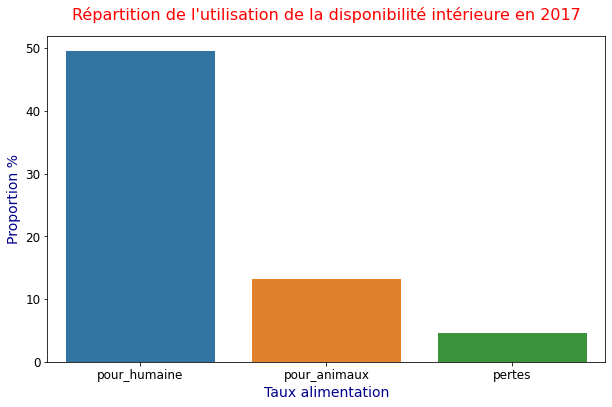

In [235]:
plt.figure(figsize=(10, 6))
sns.barplot(x='taux_alimentation', y = 'proportion', data = df_taux )
plt.xlabel("Taux alimentation",fontsize = 14, color = 'darkblue')
plt.ylabel('Proportion %', fontsize = 14, color = 'darkblue')
plt.title("Répartition de l'utilisation de la disponibilité intérieure en 2017", fontsize = 16, color = 'red',y =1.03)
plt.tick_params(axis = "both", labelsize=12)
nouveaux_xticks = ["pour_humaine", "pour_animaux", "pertes"]
locs, labels=plt.xticks()
plt.xticks(locs, nouveaux_xticks)


## Partie 3 - MISSION (Julien )

### 1.Relation entre disponibilité intérieure et les autres variables exprimées en milliers de tonnes
Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type : A1 + A2 + … = disponibilité intérieure = B1 + B2 + …

**A. Créer la dataframe avec les donées aux 10 variables, pays et disponibilité intérieure**

In [236]:
rela_dispo_inter = dispo_alimentaire[["zone","aliments_animaux","autre", "nourriture", "pertes", "semences", "traitement", "impor_qte", "expor_qte", "production", "variation_stock","dispo_inter"]].copy()
rela_dispo_inter.head()

,zone,aliments_animaux,autre,nourriture,pertes,semences,traitement,impor_qte,expor_qte,production,variation_stock,dispo_inter
0,Afghanistan,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,53.0,NaN,53.0
1,Afghanistan,NaN,NaN,39.0,2.0,NaN,NaN,40.0,2.0,3.0,NaN,41.0
2,Afghanistan,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0
3,Afghanistan,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
4,Afghanistan,NaN,NaN,82.0,NaN,NaN,NaN,82.0,NaN,NaN,NaN,82.0


**B. Ajouter la colonne 'somme' et grouper par les pays**

In [237]:
rela_dispo_inter['somme_util'] =  rela_dispo_inter['aliments_animaux'] + rela_dispo_inter['autre'] + rela_dispo_inter['nourriture'] + rela_dispo_inter['pertes'] + rela_dispo_inter['semences'] + rela_dispo_inter['traitement']

In [238]:
rela_dispo_inter['somme_stock'] = rela_dispo_inter['impor_qte'] - rela_dispo_inter['expor_qte'] + rela_dispo_inter['production'] + rela_dispo_inter['variation_stock']

In [239]:
rela_dispo_inter.head()

,zone,aliments_animaux,autre,nourriture,pertes,semences,traitement,impor_qte,expor_qte,production,variation_stock,dispo_inter,somme_util,somme_stock
0,Afghanistan,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,53.0,NaN,53.0,NaN,NaN
1,Afghanistan,NaN,NaN,39.0,2.0,NaN,NaN,40.0,2.0,3.0,NaN,41.0,NaN,NaN
2,Afghanistan,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN
3,Afghanistan,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
4,Afghanistan,NaN,NaN,82.0,NaN,NaN,NaN,82.0,NaN,NaN,NaN,82.0,NaN,NaN


In [240]:
rela_dispo_inter_2 = rela_dispo_inter[["zone", "dispo_inter", "somme_util", "somme_stock"]].groupby('zone').sum()
rela_dispo_inter_2.head()

,dispo_inter,somme_util,somme_stock
zone,,,
Afghanistan,13515.0,0.0,248.0
Afrique du Sud,61256.0,12620.0,32896.0
Albanie,4758.0,464.0,3863.0
Algérie,42630.0,9460.0,39697.0
Allemagne,162275.0,32838.0,119614.0


**C. Calculer le total pour chaque colonne** 

In [241]:
total_util = rela_dispo_inter_2["somme_util"].sum()
total_stock = rela_dispo_inter_2["somme_stock"].sum()
total_dispo_inter = rela_dispo_inter_2["dispo_inter"].sum()

In [242]:
print("total_util: ", "%.2e" %total_util, 
      "\ntotal_stock: ", "%.2e" %total_stock,
      "\ntotal_dispo_inter: ", "%.2e" %total_dispo_inter)

total_util:  1.55e+06 
total_stock:  6.23e+06 
total_dispo_inter:  9.85e+06


***- CONCLUSION: la disponibilité intérieure correspond à la Somme_util(alimentation animale + nourriture + pertes + semences + traitement + autres utlisation), et aussi  égale à la Somme_stock(production + importations - exportations + variation).***

**D. Visualisation de la répartition de la disponibilité intérieure.**

In [243]:
proportion_util = dispo_alimentaire[["aliments_animaux","autre", "nourriture", "pertes", "semences", "traitement"]]
proportion_util.head()

,aliments_animaux,autre,nourriture,pertes,semences,traitement
0,NaN,NaN,53.0,NaN,NaN,NaN
1,NaN,NaN,39.0,2.0,NaN,NaN
2,NaN,NaN,2.0,NaN,NaN,NaN
3,NaN,NaN,0.0,NaN,NaN,NaN
4,NaN,NaN,82.0,NaN,NaN,NaN


In [244]:
value = proportion_util.sum()
names = ["aliments_animaux","autre", "nourriture", "pertes", "semences", "traitement"]

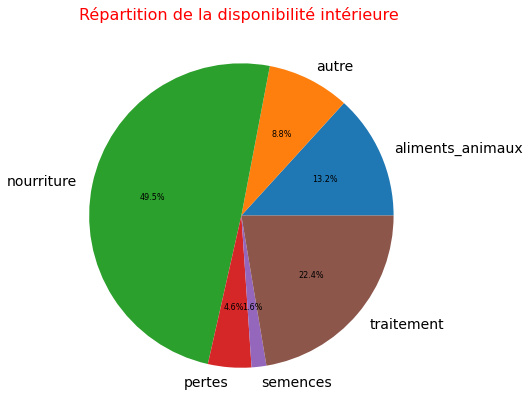

In [245]:
plt.figure(figsize=(7,7))
patches, l_text, p_text=plt.pie(value, labels=names, autopct='%.1f%%')
plt.title("Répartition de la disponibilité intérieure ", fontsize = 16, color = 'red')
for t in p_text:
    t.set_size(8)
for t in l_text:
    t.set_size(14)
    

### 2. Utilisation des céréales pour l'alimentation humaine et animale

Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien juste ci-dessus.

**A. Créer la dataframe des céréales par type de produits**

In [246]:
liste_cereale = ["Blé","Maïs","Millet","Orge","Riz(EqBlanchi)","Avoine","Céréales,Autres","Seigle","Sorgho"]
df3 = dispo_alimentaire[["zone","produit","aliments_animaux", "nourriture", "dispo_inter"]]
df3 = df3[df3['produit'].isin(liste_cereale)]
df3.head()

,zone,produit,aliments_animaux,nourriture,dispo_inter
7,Afghanistan,Blé,NaN,4895.0,5992.0
32,Afghanistan,Maïs,200.0,76.0,313.0
34,Afghanistan,Millet,NaN,12.0,13.0
40,Afghanistan,Orge,360.0,89.0,524.0
67,Afrique du Sud,Avoine,8.0,40.0,49.0


In [247]:
df_cereale = df3.groupby("produit").sum()
df_cereale.reset_index(drop=False, inplace=True)
df_cereale.head()

,produit,aliments_animaux,nourriture,dispo_inter
0,Avoine,16251.0,3903.0,23407.0
1,Blé,129668.0,457824.0,679498.0
2,Maïs,546116.0,125184.0,955799.0
3,Millet,3306.0,23040.0,29911.0
4,Orge,92658.0,6794.0,140439.0


**B. Calculer la proportion d'utilisation des céréales pour l'alimentation humaine et animal dans le monde**

In [248]:
# Calculer la proportion pour chaque type de céréales
df_cereale['propo_nourri'] = round((100*df_cereale['nourriture']/df_cereale['dispo_inter']),2)
df_cereale['propo_animaux'] = round((100*df_cereale['aliments_animaux']/df_cereale['dispo_inter']),2)

In [249]:
df_cereale

,produit,aliments_animaux,nourriture,dispo_inter,propo_nourri,propo_animaux
0,Avoine,16251.0,3903.0,23407.0,16.67,69.43
1,Blé,129668.0,457824.0,679498.0,67.38,19.08
2,Maïs,546116.0,125184.0,955799.0,13.10,57.14
3,Millet,3306.0,23040.0,29911.0,77.03,11.05
4,Orge,92658.0,6794.0,140439.0,4.84,65.98
5,Seigle,8099.0,5502.0,16567.0,33.21,48.89
6,Sorgho,24808.0,24153.0,58237.0,41.47,42.60


In [250]:
# Calculer la proportion pour totale de céréales
prop_animaux = 100 * df_cereale['aliments_animaux'].sum() / df_cereale['dispo_inter'].sum()
prop_humain =  100 * df_cereale['nourriture'].sum() / df_cereale['dispo_inter'].sum()

In [251]:
print("%.2f" %prop_animaux, "% des céréales sont utiliées pour les animaux.",
     "\n%.2f" %prop_humain, "% des céréales sont  utiliées comme nourriture pour les humains.")

43.12 % des céréales sont utiliées pour les animaux. 
33.95 % des céréales sont  utiliées comme nourriture pour les humains.


**C. Visualisation de la répartition des céréales.**

In [252]:
repart_cere = df_cereale[["produit","propo_nourri","propo_animaux"]]
repart_cere

,produit,propo_nourri,propo_animaux
0,Avoine,16.67,69.43
1,Blé,67.38,19.08
2,Maïs,13.10,57.14
3,Millet,77.03,11.05
4,Orge,4.84,65.98
5,Seigle,33.21,48.89
6,Sorgho,41.47,42.60


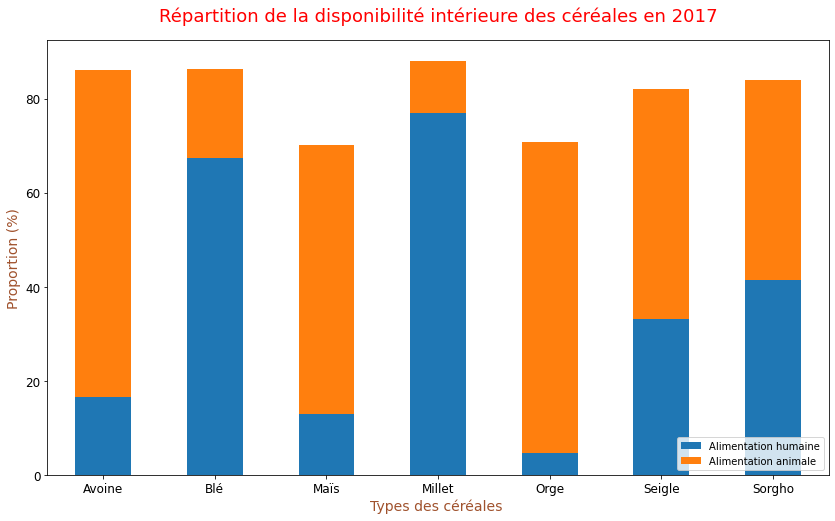

In [253]:
fig=repart_cere.plot.bar(figsize=(14,8), x = "produit", stacked=True, rot=0)
plt.title("Répartition de la disponibilité intérieure des céréales en 2017",fontsize = 18, color = 'red',y =1.03)
fig.legend(["Alimentation humaine", "Alimentation animale"], fontsize=10,loc="lower right")
plt.xlabel("Types des céréales ", fontsize = 14, color = '#A0522D')
plt.ylabel('Proportion (%)', fontsize = 14, color = '#A0522D')
plt.tick_params(axis = "both", labelsize=12)


### 3.Utilisation du maniocs en Thaïlande

Enfin, je me souviens d’un exemple étonnant d’utilisation du par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport à la production.

**A. Calculer la population Thaïlandaise sous-alimentée**

In [254]:
# Utilise la table avec la population et le nombre de personnes sous-alimentées
popu_sous.head()

,zone,année,populations,nbr_pers
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,NaN


In [255]:
nbr_thai = popu_sous.loc[popu_sous['zone']=='Thaïlande',:]
nbr_thai

,zone,année,populations,nbr_pers
185,Thaïlande,2017,69209.81,6.2


In [256]:
sous_ali_thai = 100*(nbr_thai["nbr_pers"]*1000) / nbr_thai["populations"]
sous_ali_thai

185    8.958268
dtype: float64

In [257]:
print("Il y a ", "%.2f" %sous_ali_thai, "% de la population Thaïlandaise sous-alimentée.")

Il y a  8.96 % de la population Thaïlandaise sous-alimentée.


**B. Sélection des données Nourriture, Exportation et Production pour la manioc en Thaïlande**

In [258]:
dispo_alimentaire.head()

,zone,produit,origine,aliments_animaux,autre,dispo_ali_kcal_pers_j,dispo_ali_kg_pers_an,dispo_mg_g_pers_j,dispo_pt_g_pers_j,dispo_inter,expor_qte,impor_qte,nourriture,pertes,production,semences,traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [259]:
df5= dispo_alimentaire[["zone", "produit", "expor_qte","production","nourriture"]]
df5.head()

,zone,produit,expor_qte,production,nourriture
0,Afghanistan,Abats Comestible,NaN,53.0,53.0
1,Afghanistan,"Agrumes, Autres",2.0,3.0,39.0
2,Afghanistan,Aliments pour enfants,NaN,NaN,2.0
3,Afghanistan,Ananas,NaN,NaN,0.0
4,Afghanistan,Bananes,NaN,NaN,82.0


In [260]:
maniocs_thai = df5.loc[(df5['zone']=='Thaïlande') & (df5['produit']=='Manioc'),:].copy()
maniocs_thai

,zone,produit,expor_qte,production,nourriture
13809,Thaïlande,Manioc,25214.0,30228.0,871.0


**C. Calcul de la proportion du maniocs pour l'exportation et l'alimentation humaine en Thaïlande**

In [261]:
propo_nourri = 100*maniocs_thai["nourriture"] / maniocs_thai["production"]
propo_export = 100*maniocs_thai["expor_qte"] / maniocs_thai["production"]

In [262]:
maniocs_thai["propo_nourriture"] = propo_nourri
maniocs_thai["propo_export"] = propo_export
maniocs_thai

,zone,produit,expor_qte,production,nourriture,propo_nourriture,propo_export
13809,Thaïlande,Manioc,25214.0,30228.0,871.0,2.881434,83.41273


**Résultat :**

In [263]:
print( "Il y a ", "%.2f" %sous_ali_thai, "% de la population Thaïlandaise sous-alimentée.",
      "\n%.2f" %propo_export, "% du maniocs en Thaïlande pour l'exportation.",
      "\n%.2f" %propo_nourri,"% du maniocs pour l'alimentation humaine.")

Il y a  8.96 % de la population Thaïlandaise sous-alimentée. 
83.41 % du maniocs en Thaïlande pour l'exportation. 
2.88 % du maniocs pour l'alimentation humaine.


## Partie 4 - MISSION (Mélanie )

### 1. Liste des 10 pays ou la proportion de personnes sous-alimentées est la plus élevée en 2017

In [264]:
# Utilise la table avec la population et le nombre de personnes sous-alimentées
popu_sous.head()

,zone,année,populations,nbr_pers
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,NaN


**A. Calul de la proportion de la population sous-alimentée par zone**

In [265]:
# Ajoute une nouvelle colonne "prop_sous_ali"
popu_sous['prop_sous_ali'] = 100*(1000*popu_sous['nbr_pers'] / popu_sous['populations'])

In [266]:
popu_sous.head()

,zone,année,populations,nbr_pers,prop_sous_ali
0,Afghanistan,2017,36296.113,10.5,28.928718
1,Afrique du Sud,2017,57009.756,3.1,5.437666
2,Albanie,2017,2884.169,0.1,3.467203
3,Algérie,2017,41389.189,1.3,3.140917
4,Allemagne,2017,82658.409,NaN,NaN


**B. Liste des 10 pays où la proportion de personnes sous-alimentées est la plus élevée**

In [267]:
proportion_sous_ali = popu_sous.sort_values(by='prop_sous_ali', ascending=False).head(10)

In [268]:
proportion_sous_ali

,zone,année,populations,nbr_pers,prop_sous_ali
78,Haïti,2017,10982.366,5.3,48.259182
157,République populaire démocratique de Corée,2017,25429.825,12.0,47.188685
108,Madagascar,2017,25570.512,10.5,41.062924
103,Libéria,2017,4702.226,1.8,38.279742
100,Lesotho,2017,2091.534,0.8,38.249438
183,Tchad,2017,15016.753,5.7,37.957606
161,Rwanda,2017,11980.961,4.2,35.055619
121,Mozambique,2017,28649.018,9.4,32.810898
186,Timor-Leste,2017,1243.258,0.4,32.173531
0,Afghanistan,2017,36296.113,10.5,28.928718


**C. Visualise  les résultats avec seaborn**

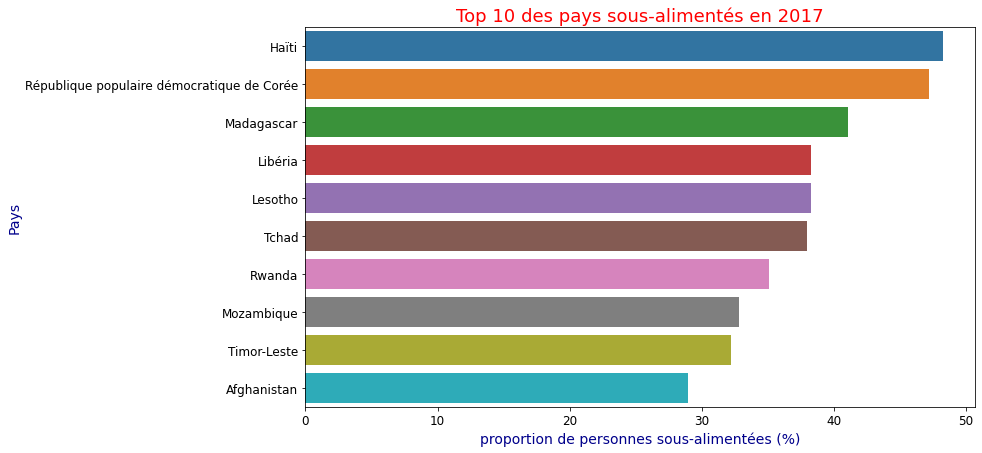

In [269]:
plt.figure(figsize=(12, 7))
sns.barplot(x='prop_sous_ali', y = 'zone', data = proportion_sous_ali )
plt.xlabel('proportion de personnes sous-alimentées (%)', fontsize = 14, color = 'darkblue',y =1.03)
plt.ylabel('Pays', fontsize = 14, color = 'darkblue')
plt.title('Top 10 des pays sous-alimentés en 2017', fontsize = 18, color = 'red')
plt.tick_params(axis = "both", labelsize=12)

### 2. Liste des 10 pays qui ont le plus bénéficié d’aide depuis 2013

In [270]:
aide_alimentaire.head()

,zone,année,produit,valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [271]:
# Créer la table 'pays_benef' avec les pays et leur bénef total
pays_benef = aide_alimentaire[['zone', 'valeur']].groupby('zone').sum()
pays_benef.reset_index(drop=False, inplace=True)
pays_benef.head()

,zone,valeur
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666


In [272]:
# Top 10 pays qui ont le plus bénéficié d’aide depuis 2013
pays_benef_10 = pays_benef.sort_values(by='valeur', ascending=False).head(10)
pays_benef_10

,zone,valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


**- Visualise les résultats avec seaborn**

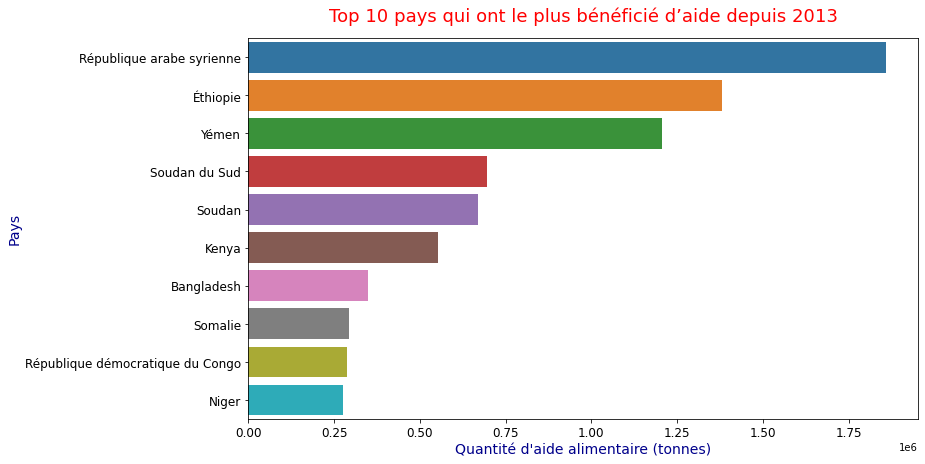

In [273]:
plt.figure(figsize=(12, 7))
sns.barplot(x='valeur', y = 'zone', data = pays_benef_10)
plt.xlabel("Quantité d'aide alimentaire (tonnes)", fontsize = 14, color = 'darkblue')
plt.ylabel('Pays', fontsize = 14, color = 'darkblue')
plt.title('Top 10 pays qui ont le plus bénéficié d’aide depuis 2013', fontsize = 18, color = 'red',y =1.03)
plt.tick_params(axis = "both", labelsize=12)

### 3. Liste des 10 pays ayant le plus/le moins de disponibilité/habitant en 2013

In [274]:
# Créer la table 'dispo_ali_pays' avec les pays et disponibilité alimentaire (Kcal/personne/jour)
dispo_ali_pays = dispo_alimentaire[['zone','dispo_ali_kcal_pers_j']].groupby('zone').sum()
dispo_ali_pays.reset_index(drop=False, inplace=True)
dispo_ali_pays.head()

,zone,dispo_ali_kcal_pers_j
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


**A. - Liste des 10 pays ayants le plus de disponibilités alimentaires par habitant**

In [275]:
dispo_ali_plus_10 = dispo_ali_pays.sort_values(by='dispo_ali_kcal_pers_j', ascending=False).head(10)
dispo_ali_plus_10 

,zone,dispo_ali_kcal_pers_j
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


**- Visualise les "Top 10 pays ayants le plus de disponibilités alimentaires par habitant" avec seaborn**

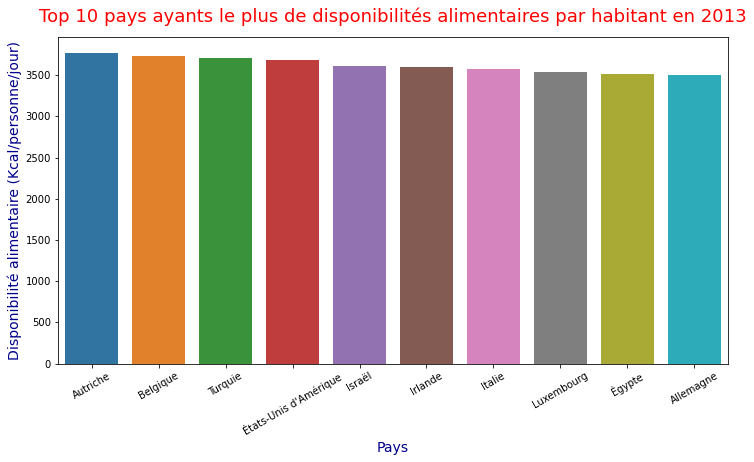

In [276]:
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y = 'dispo_ali_kcal_pers_j', data = dispo_ali_plus_10)
plt.xlabel("Pays", fontsize = 14, color = 'darkblue')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)', fontsize = 14, color = 'darkblue')
plt.title('Top 10 pays ayants le plus de disponibilités alimentaires par habitant en 2013', fontsize = 18, color = 'red',y =1.03)
plt.tick_params(axis = "x", labelrotation=30)

 **B.- Liste des 10 pays ayant le moins de disponibilités alimentaires par habitant**

In [277]:
dispo_ali_moins_10 = dispo_ali_pays.sort_values(by='dispo_ali_kcal_pers_j', ascending=True).head(10)
dispo_ali_moins_10 

,zone,dispo_ali_kcal_pers_j
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


**- Visualise les "Top 10 pays ayants le moins de disponibilités alimentaires par habitant" avec seaborn"**

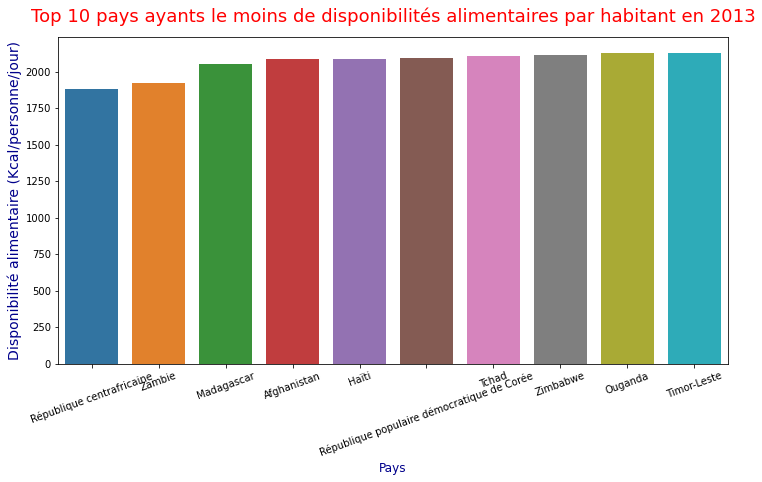

In [278]:
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y = 'dispo_ali_kcal_pers_j', data = dispo_ali_moins_10)
plt.xlabel("Pays", fontsize = 12, color = 'darkblue')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)', fontsize = 14, color = 'darkblue')
plt.title('Top 10 pays ayants le moins de disponibilités alimentaires par habitant en 2013', fontsize = 18, color = 'red',y =1.03)
plt.tick_params(axis = "x", labelrotation=20)

### 4. Relation entre le nombre de personnes sous-alimentées et l'aide alimentaire pour le top 30 des pays sous-alimentés
 

**A. Utiliser les tables "pays_benef" et "sous_nutrition_17"**

In [279]:
#Utiliser la table "pays_benef" avec les pays et leur bénef total (en tonnes) depuis 2013
pays_benef.head()

,zone,valeur
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666


In [280]:
#Utiliser la table "sous_nutrition_17" avec les pays et le nombre personnes sous-alimentées en 2017 ( en millions d’habitants)
sous_nutrition_17.head()

,zone,année,nbr_pers
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,NaN


**B. Créer la table avec les pays, le nombre de personnes sous-alimentées et la quantité d'aide alimentaire**

In [281]:
#Joindre les 2 tables : pays_benef et sous_nutrition_17
df7 = pd.merge(sous_nutrition_17,pays_benef, how='inner',on='zone')
df7.head()

,zone,année,nbr_pers,valeur
0,Afghanistan,2017,10.5,185452
1,Algérie,2017,1.3,81114
2,Angola,2017,5.8,5014
3,Bangladesh,2017,21.5,348188
4,Bénin,2017,0.8,22224


In [282]:
rela_sous_aid = df7[["zone","nbr_pers", "valeur" ]].sort_values(by="nbr_pers", ascending=False).head(30)

In [283]:
rela_sous_aid.head()

,zone,nbr_pers,valeur
49,Pakistan,24.8,231072
3,Bangladesh,21.5,348188
21,Éthiopie,21.1,1381294
51,Philippines,15.7,171722
58,République-Unie de Tanzanie,13.4,172022


**B. - Visualiser "Relation entre le nombre de personnes sous-alimentées et l'aide alimentaire depuis 2013" pour le top 30 des pays sous alimentés**

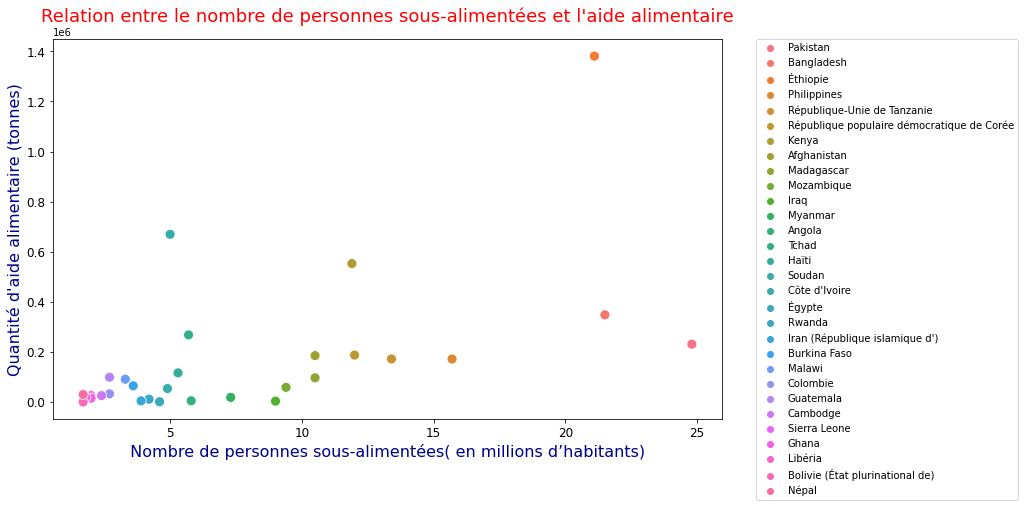

In [284]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='nbr_pers', y = 'valeur', data = rela_sous_aid, hue = 'zone', s =100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel(" Nombre de personnes sous-alimentées( en millions d’habitants) ", fontsize = 16, color = 'darkblue')
plt.ylabel("Quantité d'aide alimentaire (tonnes)", fontsize = 16, color = 'darkblue')
plt.title("Relation entre le nombre de personnes sous-alimentées et l'aide alimentaire", fontsize = 18, color = 'red', y =1.03)
plt.tick_params(axis = "both", labelsize=12)

**- Visualiser avec  une courbe de régression**

(0.0, 26.0)

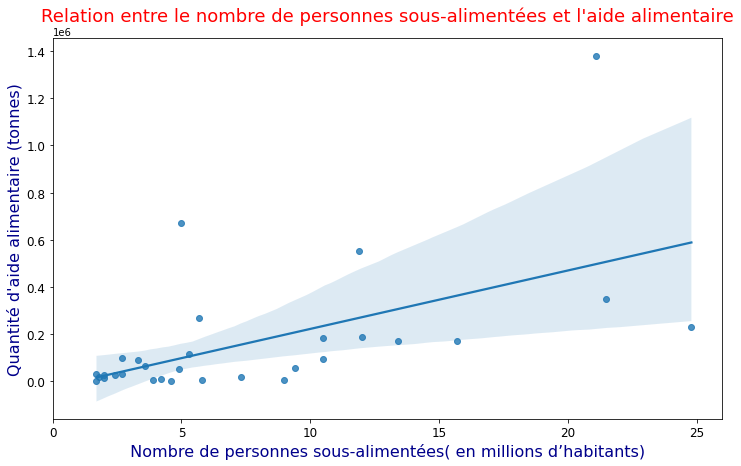

In [285]:
plt.figure(figsize=(12, 7))
sns.regplot(x='nbr_pers', y = 'valeur', data = rela_sous_aid)
plt.xlabel(" Nombre de personnes sous-alimentées( en millions d’habitants) ", fontsize = 16, color = 'darkblue')
plt.ylabel("Quantité d'aide alimentaire (tonnes)", fontsize = 16, color = 'darkblue')
plt.title("Relation entre le nombre de personnes sous-alimentées et l'aide alimentaire", fontsize = 18, color = 'red',y =1.03)
plt.tick_params(axis = "both", labelsize=12)
plt.xlim((0, 26))

***CONCLUSION:   
-Pour les 30 pays qui ont le plus de personnes sous-alimentées, la quantité d'aide alimentaire augmente avec le nombre de personnes sous-alimentées.  
-Pour des pays comme le Pakistan, le Bangladesh,les Philippines, la quantité d'aide alimentaire est relativement faible en comparaison avec leur nombre de personnes sous-alimentées.***